In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('response_times_post_update.csv')
df.head()

,iteracao,endpoint,tempo_resposta
0,1,register,0.489603
1,1,login,0.250274
2,1,refresh,0.055874
3,1,logout,0.062406
4,2,register,0.120031


In [23]:
stats = df.groupby('endpoint')['tempo_resposta'].describe()

print("Estatísticas descritivas por endpoint:")
print(stats)

Estatísticas descritivas por endpoint:
           count      mean       std       min       25%       50%       75%  \
endpoint                                                                       
login     1000.0  0.086724  0.011883  0.071613  0.079051  0.083310  0.091994   
logout    1000.0  0.019957  0.005368  0.013972  0.016518  0.018338  0.021805   
refresh   1000.0  0.019071  0.006681  0.013602  0.015950  0.017594  0.020192   
register  1000.0  0.089503  0.017334  0.070627  0.080785  0.087130  0.096295   

               max  
endpoint            
login     0.250274  
logout    0.062406  
refresh   0.173042  
register  0.489603  


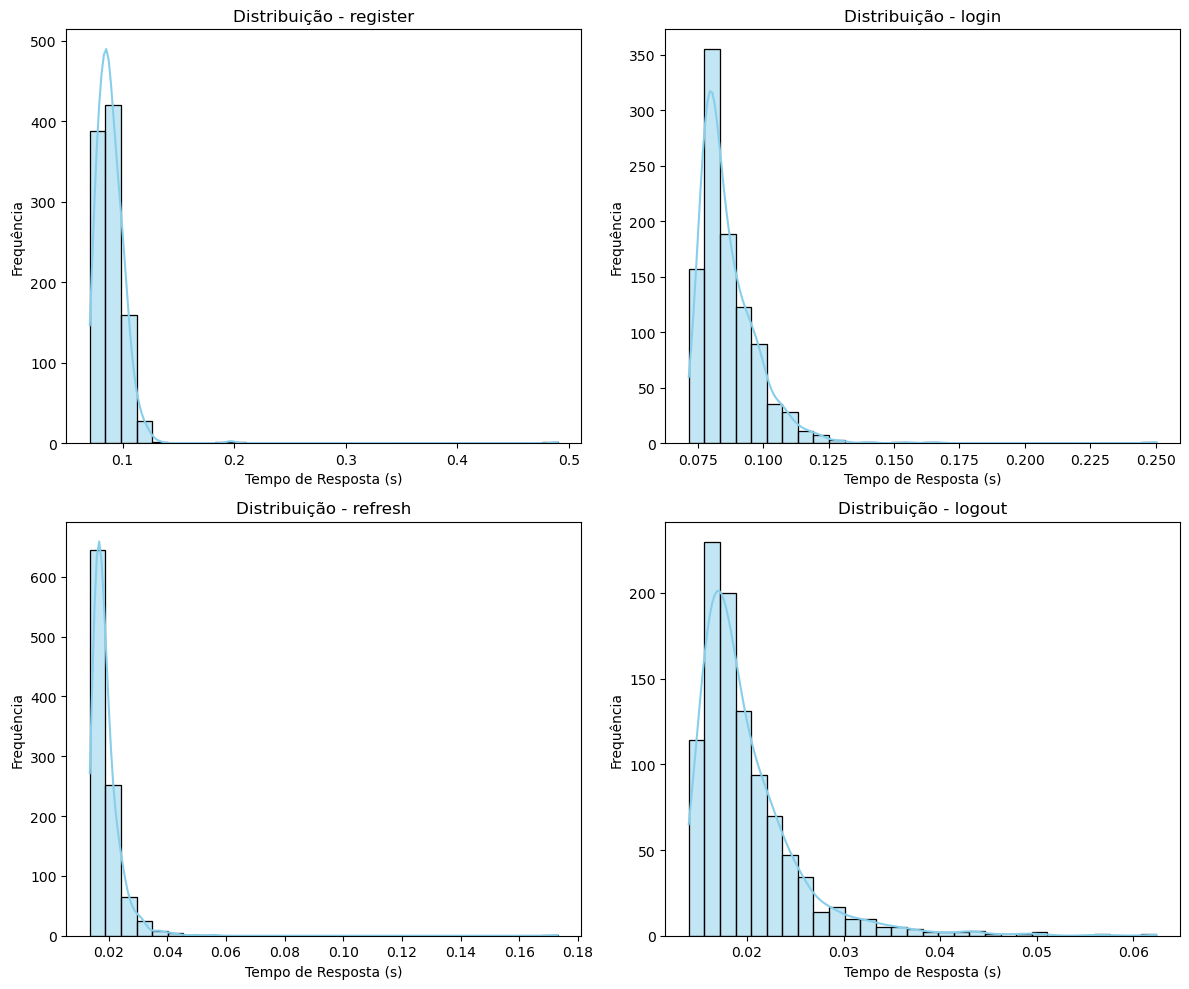

In [24]:
import seaborn as sns

plt.figure(figsize=(12, 10))
endpoints = df['endpoint'].unique()

for i, endpoint in enumerate(endpoints, 1):
    plt.subplot(2, 2, i)
    subset = df[df['endpoint'] == endpoint]
    sns.histplot(subset['tempo_resposta'], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribuição - {endpoint}')
    plt.xlabel('Tempo de Resposta (s)')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


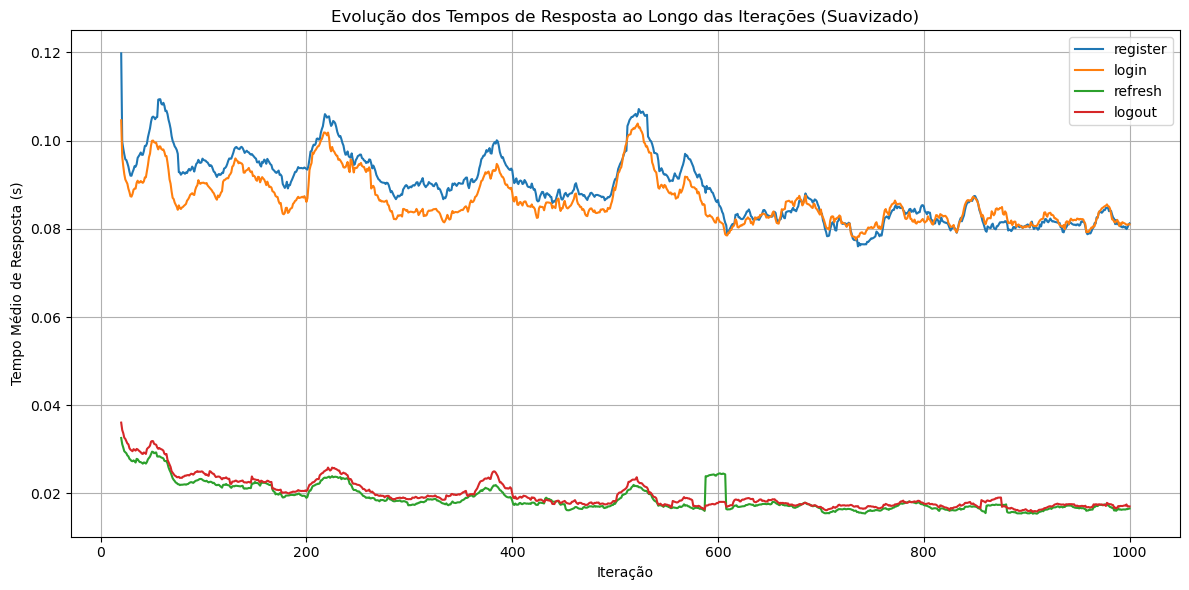

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for endpoint in df['endpoint'].unique():
    subset = df[df['endpoint'] == endpoint]
    # Suaviza com média móvel (rolling)
    avg_per_iteration = subset.groupby('iteracao')['tempo_resposta'].mean().rolling(window=20).mean()
    plt.plot(avg_per_iteration, label=endpoint)

plt.title('Evolução dos Tempos de Resposta ao Longo das Iterações (Suavizado)')
plt.xlabel('Iteração')
plt.ylabel('Tempo Médio de Resposta (s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
